In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
import math

In [3]:
data = loadmat('data/ex4data1.mat')
weights = loadmat('data/ex4weights.mat')

In [4]:
X = data['X']
y = data['y']

In [5]:
theta1 = weights['Theta1']
theta2 = weights['Theta2']

In [6]:
theta1.shape

(25, 401)

In [7]:
theta2.shape

(10, 26)

In [8]:
def displayData(X):
    m,n = X.shape
    example_width = round(math.sqrt(n))
    example_height = round(n/example_width)
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m/display_rows)
    
    pad = 1
    display_array = np.ones((pad + display_rows*(example_height + pad), pad + display_cols*(example_width + pad)))
    curr_ex = 0
    
    for i in range(1, display_rows +1):
        for j in range(1, display_cols +1):
            if (curr_ex>=m):
                break
            else:
                max_val = max(abs(X[curr_ex]))
                display_array[pad + (i-1)*(example_height+pad): i*(example_height+pad) , pad + (j-1)*(example_width+pad): j*(example_width+pad)]\
                = X[curr_ex].reshape((example_height, example_width))/max_val
                curr_ex +=1
        if (curr_ex >=m):
            break
    plt.imshow(display_array, cmap='gray')
    plt.axis('off')
    plt.show()
    

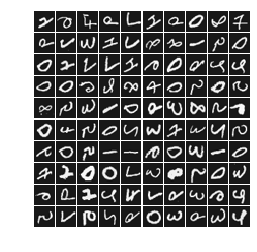

In [9]:
random_select = np.random.randint(0, X.shape[0], 100)
X_plot = X[random_select]
displayData(X_plot)

Theta parameters are unrolled using 
<a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html'>np.ravel(order='F')</a> function, here order='F' means unrolling parameters column-wise( similar to matlab default unrolling theta\[:\] )

In [10]:
# Feed Forwards without regularisation
num_labels = len(np.unique(y))
hidden_layer_size = 25
input_layer_size = 400  #400 features per training example
reg_parameter = 0
nn_params = np.hstack((theta1.ravel(order='F'), theta2.ravel(order='F'))) #unrolling the theta parameters column wise

In [11]:
x = theta1.ravel(order='F')

In [12]:
def sigmoid(Z):
    sig = 1/(1+np.exp(-Z))
    return sig

## Computing Cost

nnCostFunction takes unrolled theta parameters for the hidden & output layers of NN, it returns the cost and unrolled gradient parameters for the theta

theta1 and theta2 are reshaped according to respective number of units and number of features<br>
theta[i] shape = (num_of_units_in_layer i, number of features(X.shape[1]))

a2 = output of output layer with shape -> (5000,10) where in each row the maximum number value index specifies the digit<br> predicted by the network.<br>
We will encode y as one-hot encoding keeping only one of them as 1 and rest as zeros<br>
The regularisation term now will have theta1 and theta2 and thus, both needs to be summed over to regularize the theta parameters for both the layers

![matrix.png](images/NN_cost.png)

In [13]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_of_labels, X, y, reg_parameter=0):
    #rolling the parameters again column wise
    theta1 = np.reshape(nn_params[:hidden_layer_size*(input_layer_size+1)], (hidden_layer_size,input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size*(input_layer_size+1):], (num_of_labels, hidden_layer_size+1), order='F')
    m = len(y)
    a0 = np.hstack((np.ones((X.shape[0],1)), X))
    z1 = np.dot(a0, theta1.T)
    a1 = sigmoid(z1)
    a1 = np.hstack((np.ones((a1.shape[0],1)), a1))
    z2 = np.dot(a1, theta2.T)
    a2 = sigmoid(z2)
    y_d = pd.get_dummies(y.flatten())
    result = np.argmax(a2, axis=1) + 1
    temp1 = np.multiply(y_d, np.log(a2))
    temp2 = np.multiply(1-y_d, np.log(1-a2))
    temp3 = np.sum(temp1 + temp2)
    sum1 = np.sum(np.power(theta1[:,1:],2))  #np.sum(np.sum(np.power(theta1[:,1:], 2), axis =1)) this way two time sum is required
    sum2 = np.sum(np.power(theta2[:,1:],2))
    J = np.sum(temp3 / (-m)) + (sum1 + sum2) * reg_parameter / (2*m)
    return J

In [14]:
theta1.shape

(25, 401)

In [15]:
np.sum(np.power(theta1[:,1:],2))

392.5841424276844

In [92]:
a0 = np.hstack((np.ones((X.shape[0],1)), X))
z1 = np.dot(a0, theta1.T)
a1 = sigmoid(z1)
a1 = np.hstack((np.ones((a1.shape[0],1)), a1))
z2 = np.dot(a1, theta2.T)
a2 = sigmoid(z2)
a2[0]

array([1.12661530e-04, 1.74127856e-03, 2.52696959e-03, 1.84032321e-05,
       9.36263860e-03, 3.99270267e-03, 5.51517524e-03, 4.01468105e-04,
       6.48072305e-03, 9.95734012e-01])

In [99]:
J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg_parameter)

In [111]:
J

0.2876291651613187

In [112]:
J_test = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 1)

In [113]:
J_test

0.3837698590909234

## One-Hot Encoding
<a href= 'http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html'>pd.get_dummies()</a> can be used for one-hot encoding of values

In [62]:
y_d = pd.get_dummies(y.flatten())

In [63]:
y_d

,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1


## Sigmoid Gradient

This function calculates the gradient for sigmoid function

In [114]:
def sigmoidGradient(z):
    grad = np.zeros(z.shape)
    gz = 1/(1+np.exp(-z))
    grad = gz*(1-gz)
    return grad

In [122]:
grad_test = sigmoidGradient(np.array([[-1, -0.5, 0, 0.5, 1]]))

In [125]:
grad_test

array([[0.19661193, 0.23500371, 0.25      , 0.23500371, 0.19661193]])

## Building a NN from starting

The Neural Network is of three layers:-<br>
<ol> 
    <li> Input layer just to accept input features of size (400,)</li>
    <li> One Hidden layer of size (25,401), 25 for 25 units and 401 for input_features including bias, corresponds to theta1</li>
    <li>One Ouput layer of size (10,26), 10 for 10 output units and 26 for input_features from hidden layer + bias, corresponds
        to theta2
    </li>
</ol>

### Initialising Theta

We will initialise theta1 and theta2 with random values based on the shape of layers<br>
When training neural networks, it is important to randomly initialize the parameters for **symmetry breaking.**<br>
One effective strategy for random initialization is to randomly select values for theta(l) uniformly in the range [-epsilon<sub>init</sub>, epsilon<sub>init</sub>]<br>
This range of values ensures that the parameters are kept small and makes the learning more efficient.<br>
epsilon<sub>init</sub> = 0.12<br>
<i>l_in refers to incoming connection</i><br>
<i>l_out refers to outgoing connection</i>


To randomly initialise a numpy array we will use 
<a href= 'https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html'>np.random.rand()</a>

One effective strategy for choosing epsilon<sub>init</sub> is to base it on the number of units in the
network. A good choice of epsilon<sub>init</sub> is <br>
![matrix.png](images/epsilon_init.png)
, where Lin = s<sub>l</sub> and Lout = </sub>l+1</sub> are the number of units in the layers adjacent to theta(l).

In [131]:
def initialiseTheta(l_in, l_out, epsilon):
    W = np.random.rand(l_out, l_in+1)*2*epsilon - epsilon
    W[:,0] = 1
    return W

In [149]:
initial_theta1 = initialiseTheta(input_layer_size, hidden_layer_size, 0.12) #l_in = input_layer_size, l_out = num_of_units + 1

In [150]:
initial_theta1.shape

(25, 401)

In [151]:
initial_theta2 = initialiseTheta(hidden_layer_size, num_labels, 0.12) #l_in = input_layer_size, l_out = num_of_units + 1

In [152]:
initial_theta2.shape

(10, 26)

### Backpropagation

![backpropagation.png](images/backpropagation.png)

Backpropagation steps:-<br>
<ol>
    <li>FeedForward the NN</li>
    <li>Calculate O/P of NN with fixed weights</li>
    <li>Find out the error term starting from Output Layer in the backward direction</li>
    <li>Use the error term to update weights</li>
</ol>

In [153]:
nn_params = np.hstack((initial_theta1.ravel(order='F'), initial_theta2.ravel(order='F')))
input_layer_size = X.shape[1]
hidden_layer_size = 25
num_labels = 10
reg_parameter = 0


nn_params has both theta1 and theta2 with shape = (num_of_rows_of_unrolled_theta1 + num_of_rows_of_unrolled_theta2,)
<br>
i.e. nn_params is a single column vector

In [174]:
def backpropagation(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg_parameter):
    initial_theta1 = np.reshape(nn_params[:hidden_layer_size*(input_layer_size+1)], (hidden_layer_size, input_layer_size + 1))
    initial_theta2 = np.reshape(nn_params[hidden_layer_size*(input_layer_size+1):], (num_labels, hidden_layer_size +1))
#     print(inital_theta1.shape)
#     print(inital_theta2.shape)
    delta1 = np.zeros((inital_theta1.shape[0], inital_theta1.shape[1]))
    delta2 = np.zeros((inital_theta2.shape[0], inital_theta2.shape[1]))
    y_d = pd.get_dummies(y.flatten())
    for i in range(X.shape[0]):
        a0 = X[i].reshape((1,X[i].shape[0]))
        a0 = np.hstack((np.ones((a0.shape[0], 1)), a0))
        z1 = np.dot(a0, initial_theta1.T)
        a1 = sigmoid(z1)
        a1 = np.hstack((np.ones((a1.shape[0], 1)), a1))
        z2 = np.dot(a1, inital_theta2.T)
        a2 = sigmoid(z2)
        d2 = a2 - np.array(y_d.iloc[i])   #deleting the corresponding original(y) vector from network results
        d1 = np.multiply(inital_theta1.T, d2)
        

In [182]:
a0 = X[0].reshape((1,X[0].shape[0]))
a0 = np.hstack((np.ones((a0.shape[0], 1)), a0))
z1 = np.dot(a0, initial_theta1.T)
a1 = sigmoid(z1)
a1 = np.hstack((np.ones((a1.shape[0], 1)), a1))
z2 = np.dot(a1, inital_theta2.T)
a2 = sigmoid(z2)
d2 = a2 - np.array(y_d.iloc[0])
d1 = np.multiply(inital_theta1.T, d2)
print(d2.shape)

(1, 10)


In [180]:
inital_theta1.shape

(25, 401)

In [176]:
backpropagation(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg_parameter)